<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
آزمایشگاه شیمی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در این تمرین ساده سعی می‌کنیم به کمک محاسبه هیستوگرام تصویر این تمرین را حل کنیم. طول و عرض لوله ها به ما داده شده است و از ما میانگین درصد پر بودن لوله ها را خواسته اند. که خب ایده ساده برای حل، این است که مجموع پیکسل های ابی که تصویر اشغال میکند را حساب کرده و بر مجموع پیکسل های لوله ها تقسیم کنیم.
</font>
</p>

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
اضافه کردن کتابخانه های مورد نیاز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با اجرای سلول زیر تمام کتابخانه هایی که در طول این تمرین نیاز خواهد شد، import میشوند.
</font>
</p>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
بارگذاری تصویر 
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با استفاده از <code>OpenCV</code> فایل <code>1.jpg</code> را بخوانید و سپس به کمک <code>matplotlib</code> آن را نمایش دهید.
</font>
</p>

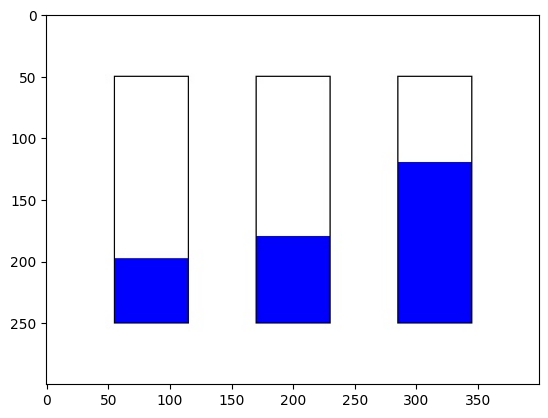

In [2]:
# Read the image
image = cv2.imread('../Data/1.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib
plt.imshow(image_rgb)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در سلول زیر، عرض و ارتفاع تصویر را در دو خط مجزا چاپ کنید.
</font>
</p>

In [3]:
# Print height and width in two lines
height = print(image_rgb.shape[0])
width = print(image_rgb.shape[1])

300
400


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
برای اینکه مجموع پیکسل های شدت آبی را محاسبه کنیم راه حل بهینه تبدیل به فرمت <code>HSV</code> و سر و کله زدن با کانال H است. همانطور که در درسنامه های قبل گفته شد، مولفه یا کانال H رنگ اصلی را مشخص میکند. در سلول زیر تصویر را به کانال <code>HSV</code> تبدیل کنید.
</font>
</p>

In [4]:
# Convert to HSV
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

In [5]:
# تنظیم دقیق محدوده رنگ آبی در HSV
lower_blue = np.array([90, 100, 50])  
upper_blue = np.array([140, 255, 255])

# در این تکه بازه ممکن رنگ آبی مشخص شد

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در سلول زیر، لطفا یک ماسک تشکیل داده و تمام پیکسل هایی که در بازه مجاز تعریف شده قسمت قبل قرار دارند را شناسایی و در متغیر <code>mask</code> ذخیره کنید.
</font>
</p>

In [6]:
mask = cv2.inRange(hsv, lower_blue, upper_blue)

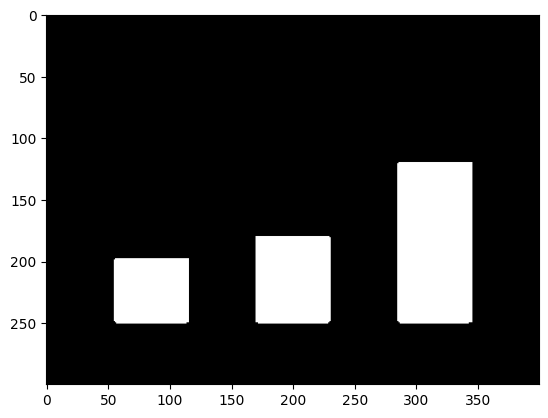

In [7]:
plt.imshow(mask, cmap='gray')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
حال به کمک <code>numpy</code> تمام پیکسل های غیر صفر ماسک را بشمارید. با اجرای سلول پایین به اولین هدف که شمارش تمام پیکسل های دارای شدت روشنایی آبی بود خواهیم رسید.
</font>
</p>

In [8]:
blue_pixels = cv2.countNonZero(mask)
print(blue_pixels)

15536


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
حال می بایست مجموع پیکسل های اشغال شده توسط لوله ها را بشماریم. 3 لوله داریم در ابعاد 60 * 200. مجموع پیکسل های درون لوله را محاسبه کنید.
</font>
</p>

In [9]:
total_tube_area = 200 * 60 * 3

In [10]:
average_filled_percentage = (blue_pixels/total_tube_area) * 100

In [11]:
print (int(average_filled_percentage))

43


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
نوشتن تابع محاسبه گر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
تمام عملیات مورد نیاز جهت محاسبه میانگین درصد پر بودن لوله ها را در تابع زیر بنویسید. دقت کنید که این تابع باید تصویری را به عنوان ورودی گرفته و خروجی آن باید عدد صحیح <code>int</code> مجموع درصد باشد. 
</font>
</p>

In [12]:
def calculation(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([90, 100, 50])
    upper_blue = np.array([140, 255, 255])

    mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

    blue_pix = cv2.countNonZero(mask)

    tube_height = 200
    tube_width = 60
    num_tubes = 3
    total_tube_area = num_tubes * tube_height * tube_width

   
    average_filled_percentage = (blue_pix / total_tube_area) * 100

    return int(average_filled_percentage)

In [13]:
# Test the function
print(calculation(image))

43


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. دقت کنید نام تابع حتما <code>calculation</code>  باشد و لطفا فایل <code>result.zip</code> را در نهایت در سایت بارگذاری کنید.

</font>
</p>

In [14]:
import zipfile
from inspect import getsource


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """
import cv2
import numpy as np
"""

%save calculation imp + getsource(calculation)


file_names = ["calculation.py", "NoteBook.ipynb"]
compress(file_names)

File `calculation.py` exists. Overwrite (y/[N])?   Y


The following commands were written to file `calculation.py`:

import cv2
import numpy as np
def calculation(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([90, 100, 50])
    upper_blue = np.array([140, 255, 255])

    mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

    blue_pix = cv2.countNonZero(mask)

    tube_height = 200
    tube_width = 60
    num_tubes = 3
    total_tube_area = num_tubes * tube_height * tube_width

   
    average_filled_percentage = (blue_pix / total_tube_area) * 100

    return int(average_filled_percentage)

File Paths:
['calculation.py', 'NoteBook.ipynb']
